# Problema 1
1. Haciendo los calculos a mano y trabajando con 7 cifras significativas, encuentre las aproximaciones a las integrales definidas:

    a. $I_1 = \int_0^1 x^4 dx$

    b. $I_2 = \int_0^{\pi} \sin{(x)} dx$

utilizando las reglas simples de *i) punto medio*, *ii) trapecio* y *iii) Simpson*. 

2. Calcule el error absoluto y el error relativo en cada caso y para cada método.

In [1]:
# Punto medio 
#a,b) ha = 1, hb = π 
fa(x) = x^4
fb(x) = sin(x)
PMa = 1 * fa(1/2)
PMb = π * fb(π/2)
println(PMa,"   ",PMb)
# Errores
# Para la formula de punto medio el error es |f''(psi)|h³/3
EPMa = 1^3 * 24/3
EPMb = (π^3)/3
println(EPMa,"   ",EPMb)

0.0625   3.141592653589793
8.0   10.335425560099939


In [2]:
# Trapecio
#a,b) ha = 1, hb = π
TRa = 1/2 * (fa(0)+fa(1))
TRb = π/2 * (fb(0)+fb(π))
println(TRa,"   ",TRb)
# Errores
ETRa = 1^3 * 24/12
ETRb = (π^3)/12
println(ETRa,"   ",ETRb)

0.5   1.9236706937217898e-16
2.0   2.5838563900249847


In [3]:
# Simpson de 3 puntos
SIa = 0.5/3 *(fa(0)+4*fa(0.5)+fa(1))
SIb = (π/2)/3 *(fb(0)+4*fb(π/2)+fb(π))
println(SIa,"   ",SIb)
# Errores
ESIa = 1^5 * 24/90
ESIb = (π^5)/90
println(ESIa,"   ",ESIb)

0.20833333333333331   2.0943951023931953
0.26666666666666666   3.40021871983646


# Problema 2

1. Repita el problema 1 dividiendo el intervalo de integración en dos subintervalos de igual tamaño. Es decir:

    a. $I_1=\int_0^{1/2} x^4 dx+ \int_{1/2}^1 x^4 dx$

    b. $I_2=\int_0^{\pi/2}\sin{(x)}dx+\int_{\pi/2}^{\pi}\sin{(x)} dx$

2. Compare resultados con lo obtenido en el problema 1.

# Problema 3
1. Construya funciones que dada una función arbitraria, retornen  las aproximaciones numéricas $S_M$, $S_T$ y $S_S$ a una integral de la forma
$$
I = \int_a ^b f(x) dx
$$
utilizando las reglas compuestas del *punto medio*, del *trapecio* y de *Simpson*, respectivamente.
Las funciones deben evaluar el integrando $f(x)$ en $n+1$ puntos equiespaciados $x_i$ para $i=0,1,2,...,n$ y con espaciamiento $h=(b-a)/n$.
En el caso del punto medio, se evalúa en los $x_i+h/2$ para $i=0,1,...,n-1$.

2. Calcule $S_M$, $S_T$ y $S_S$ para la integral:
$$
I = \int _0 ^1 e^{-x} dx
$$
Utilice un espaciamiento $h_1=0.05$ em ambos casos. Luego repita el procedimiento disminuyendo su 
espaciamiento a la mitad, $h_2=h_1/2=0.025$.

3. Teniendo en cuenta que es posible conocer el resultado exacto de la integral en cuestión, evalúe el error
$\varepsilon(h)=|S-I|$, para $h=0.05$ y $h=0.025$ para los tres métodos de aproximación.
Verifique que el cociente de precisión, definido como 
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)}
$$
toma un valor aproximado a $4$ cuando se usa la regla del *punto medio* y del *trapecio*, y un valor aproximado a $16$ cuando se usa la regla de *Simpson*. 
Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**Consejo:** tener cuidado con *Simpson* en elegir siempre un número par de intervalos, i.e, un número impar de puntos. Pruebe con una integral conocida, qué resultados da cuando usa un número impar de intervalos. Incluya en la función para dicho método un chequeo de que el número de puntos sea par.

In [86]:
function Simpson(f::Function,
    n::Int64,
    a::Float64,
    b::Float64)
    
    h = (b-a)/n
    if mod(n,2) == 1
        error("Elija un número par de intervalos.")
    end
    # Encuentro los valores de x
    xs = [(a+h*i) for i ∈ 1:n]
    # Tengo que valuar los puntos finales e iniciales y despues hacer las sumas
    s2j = 0
    for i ∈ 1:1:(n/2-1)
        s2j += f(xs[Int64(2*i)])
    end
    s2jm1 = 0
    for i ∈ 1:(n/2)
        s2jm1 += f(xs[Int(2*i-1)])
    end
    Sf = h/3 * (f(a)+2*s2j+4*s2jm1+f(b))
    
    return(Sf)
end    

Simpson (generic function with 1 method)

In [87]:
g(x) = exp(-x)
SI005 = Simpson(g,20,0.0,1.0)
SI0025 = Simpson(g,40,0.0,1.0)
println(SI005,"   ",SI0025)

0.6321205807706574   0.6321205602002449


In [88]:
1/0.025

40.0

In [89]:
function Trapecio(f::Function,
    n::Int64,
    a::Float64,
    b::Float64
    )
    h = (b-a)/n
    xs = [(a+h*i) for i ∈ 1:n]
    S = 0
    for i ∈ 1:(n-1)
        S += f(xs[i])
    end
    Sf = (h/2)*(f(a)+2*S+f(b))
    return(Sf)
end

Trapecio (generic function with 1 method)

In [90]:
TR005 = Trapecio(g,20,0.0,1.0)
TR0025 = Trapecio(g,40,0.0,1.0)
println(TR005,"   ",TR0025)

0.6322522451248159   0.6321534814313876


In [91]:
function PuntoMedio(f::Function,
    n::Int64,
    a::Float64,
    b::Float64
    )
    h = (b-a)/n
    xs = [(a+h*i) for i ∈ 1:n]
    S = 0
    for i ∈ 1:n
        S += f(xs[i]-(h/2))
    end
    Sf = h*S
    return(Sf)
end       

PuntoMedio (generic function with 1 method)

In [92]:
PM005 = PuntoMedio(g,20,0.0,1.0)
PM0025 = PuntoMedio(g,40,0.0,1.0)
println(PM005,"   ",PM0025)

0.6320547177379595   0.6321040976557455


In [93]:
# 2) Como se puede calcular la integral, la calculamos en wolfram alpha
#  https://www.wolframalpha.com/input/?i=Int+of+exp%28-x%29+form+0+to+1
I = 0.6321205588285576784044762298385391325541888689682321654921631983

0.6321205588285577

In [94]:
# Ahora podemos hacer las diferencias y valuar el error.
ESI = [abs(SI005 - I),abs(SI0025 - I)]
ETR = [abs(TR005 - I),abs(TR0025 - I)]
EPM = [abs(PM005 - I),abs(PM0025 - I)]
xs = [0.05,0.025]

2-element Array{Float64,1}:
 0.05
 0.025

In [95]:
using Plots

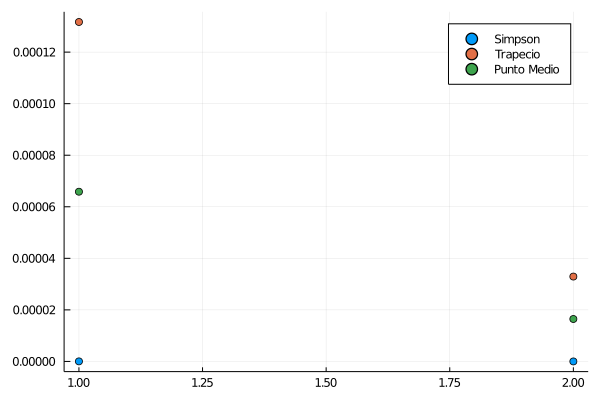

In [96]:
scatter(ESI, label= "Simpson", lw=4)
scatter!(ETR, label= "Trapecio", lw=1)
scatter!(EPM, label= "Punto Medio", lw=2)

In [97]:
Qs = ESI[1]/ESI[2]
Qt = ETR[1]/ETR[2]
Qpm = EPM[1]/EPM[2]
println(Qs,"   ",Qt,"   ",Qpm)

15.996430935988979   3.9998750080139467   3.9997812640328503


In [85]:
# Cambiar precision que paso Juan
#import Pkg; Pkg.add("ChangePrecision")
#using ChangePrecision
#@changeprecision Float32 begin
#    x = 1
#end

# Problema 4
1. Para los métodos de integración numérica del problema 3, implemente fórmulas de estimación del error en función de el número de puntos $n$, una cota máxima $M$ asociada a $f(x)$ o alguna de sus derivadas, y los extremos $a$ y $b$ del intérvalo de integración.

2. Indique, para cada método, el mínimo $n$ necesario para alcanzar un error relativo menor a $10^{-7}$ de las siguientes integrales

    a. $\int_0^{1/2} \frac{2}{x-4} \; dx$

    b. $\int_1^{3/2} x^2 \log x \; dx$

3. Compruebe usando los métodos del problema 3 si las estimaciones de $n$ son adecuadas.

In [98]:
function Error_Simpson(M::Float64,
    n::Int64,
    a::Float64,
    b::Float64
    )
    # M es una cota de la derivada 4ta de la función que estamos integrando en el intervalo de integración.
    h = (b-a)/n
    return (b-a)*(h^4)*M/180
end

Error_Simpson (generic function with 1 method)

Como necesito las derivadas cuartas para la cota del erro de simpson las busco en wolfram alpha:
a) d^4/dx^4(2/(x - 4)) = 48/(x - 4)^5
Y como estamos en el intervalo (0,1/2) la cota es cuando x=1/2
b) d^4/dx^4(x^2 log(x)) = -2/x^2
Y como estamos en el intervalo (1,3/2) la cota es cuando x=1

In [106]:
SMa = abs(48/((0.5-4)^5))

0.09139049205688106

In [107]:
Error_Simpson(SMa,20,0.0,0.5)

9.916503044366436e-11

In [108]:
SMb = abs(-2/(1^2))

2.0

In [119]:
Error_Simpson(SMb,20,1.0,1.5)

2.170138888888889e-9

In [105]:
function Error_Trapecio(M::Float64,
    n::Int64,
    a::Float64,
    b::Float64
    )
    # M es una cota a la derivada segunda de la función que estamos integrando en el intevalo de integración.
    h = (b-a)/n
    return (b-a)*(h^2)*M/12
end

Error_Trapecio (generic function with 1 method)

In [112]:
# En wolfram Alpha vemos que la derivada segunda para el punto a es: 4/(-4 + x)^3
# y como estamos en el intervalo (0,0.5) la cota es:
TMa = abs(4/(-4 + 0.5)^3)

0.09329446064139942

In [113]:
Error_Trapecio(TMa,20,0.0,0.5)

2.429543245869777e-6

In [117]:
# En wolfram Alpha vemos que la derivada segunda para el punto a es: 3 + 2 Log[x]
# y como estamos en el intervalo (1,3/2) la cota es:
TMb = abs(3 + 2 * log(1.5))

3.8109302162163288

In [120]:
Error_Trapecio(TMb,20,1.0,1.5)

9.924297438063357e-5

In [121]:
function Error_PuntoMedio(M::Float64,
    n::Int64,
    a::Float64,
    b::Float64
    )
    # M es la cota a la derivada segunda de la función que estamos integrando en el intevalo de integración.
    h = (b-a)/n
    return (b-a)*(h^2)*M/6
end

Error_PuntoMedio (generic function with 1 method)

In [123]:
# En wolfram Alpha vemos que la derivada segunda para el punto a es: 4/(-4 + x)^3
# y como estamos en el intervalo (0,0.5) la cota es:
PMMa = abs(4/(-4 + 0.5)^3)

0.09329446064139942

In [127]:
Error_PuntoMedio(PMMa,20,0.0,0.5)

4.859086491739554e-6

In [125]:
# En wolfram Alpha vemos que la derivada segunda para el punto a es: 3 + 2 Log[x]
# y como estamos en el intervalo (1,3/2) la cota es:
PMMb = abs(3 + 2 * log(1.5))

3.8109302162163288

In [128]:
Error_PuntoMedio(PMMb,20,1.0,1.5)

0.00019848594876126715

#### Ahora hacemos los errores en funcion de n y graficamos para ver a partir de que cantidad de puntos tenemos el error deseado

### a)

In [139]:
Ea_S(n) = Error_Simpson(SMa,n,0.0,0.5)
Ea_T(n) = Error_Trapecio(TMa,n,0.0,0.5)
Ea_PM(n) = Error_PuntoMedio(PMMa,n,0.0,0.5)

Ea_PM (generic function with 1 method)

In [131]:
using Plots

In [180]:
puntosa = [Int64(5*i) for i ∈ 1:40];
dm7(n) = 10^-7

dm7 (generic function with 1 method)

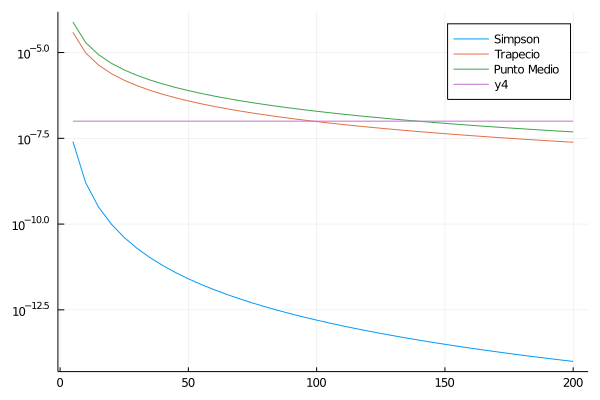

In [181]:
plot(puntosa,Ea_S.(puntosa), label="Simpson", 
    #xaxis=:log10, 
    yaxis=:log10,
    #xlims=(0.0,40.0)
)
plot!(puntosa,Ea_T.(puntosa), label="Trapecio")
plot!(puntosa,Ea_PM.(puntosa), label="Punto Medio")
plot!(puntosa,dm7.(puntosa))

In [171]:
Eb_S(n) = Error_Simpson(SMb,n,1.0,1.5)
Eb_T(n) = Error_Trapecio(TMb,n,1.0,1.5)
Eb_PM(n) = Error_PuntoMedio(PMMb,n,1.0,1.5)

Eb_PM (generic function with 1 method)

In [187]:
puntosb = [Int64(5*i) for i ∈ 1:200];
dm7(n) = 10^-7

dm7 (generic function with 1 method)

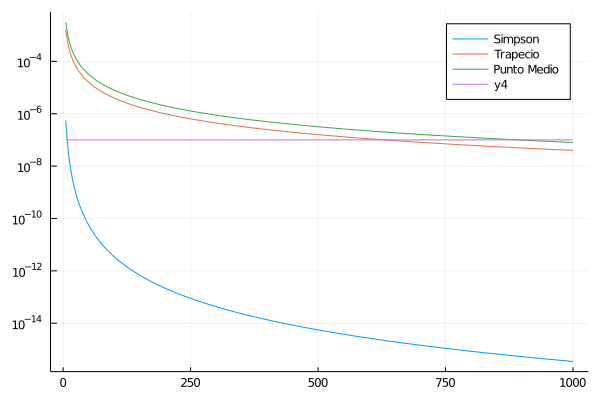

In [188]:
plot(puntosb,Eb_S.(puntosb), label="Simpson", 
    #xaxis=:log10, 
    yaxis=:log10,
    #xlims=(0.0,40.0)
)
plot!(puntosb,Eb_T.(puntosb), label="Trapecio")
plot!(puntosb,Eb_PM.(puntosb), label="Punto Medio")
plot!(puntosb,dm7.(puntosb))

# Problema 5
**Comparación de métodos.**

1. Empleando los algoritmos del problema 3, aproxime la integral
\begin{equation*}
I = \int_0^1 e^{-t} dt = 1 - e^{-1}  \nonumber              
\end{equation*}

2. Calcule el error relativo $E$ para distintos valores del número de puntos de integración, $n$. Considere valores de $n$ consecutivos hasta 100, y luego de 100 en 100 hasta $n=3000$. Grafique $E$ vs $n$ en *log-log* para verificar que
$$
E \propto n^\alpha
$$

3. Estime los exponentes $\alpha$ de las leyes de potencia observadas.

4. Use el gráfico para estimar las leyes de potencia de la dependencia del error  con el número de puntos $n$ y para determinar el número cifras decimales de precisión en cada método. Haga esto tanto para el error del algoritmo como para el de redondeo.

5. Repita los incisos anteriores en `Float32`.

In [191]:
h(t) = exp(-t)
I = 1 - exp(-1)

0.6321205588285577

In [204]:
ERelSimp(n) = abs((Simpson(h,n,0.0,1.0)-I)/Simpson(h,n,0.0,1.0))
ERelTrap(n) = abs((Trapecio(h,n,0.0,1.0)-I)/Trapecio(h,n,0.0,1.0))
ERelPM(n) = abs((PuntoMedio(h,n,0.0,1.0)-I)/PuntoMedio(h,n,0.0,1.0))

ERelPM (generic function with 1 method)

In [216]:
del1a100 = [i for i ∈ 0:2:100];
del100al3000 = [100*i for i ∈ 1:30];

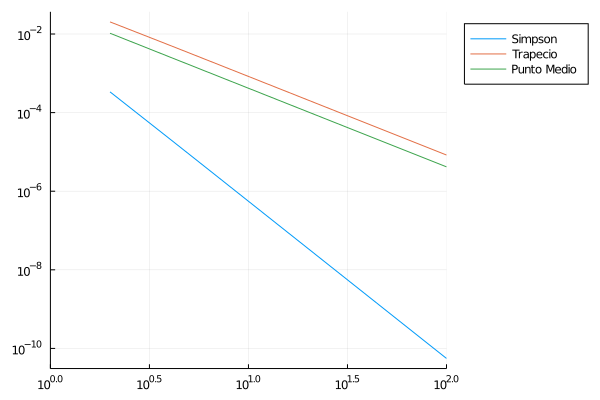

In [214]:
plot(del1a100,ERelSimp.(del1a100), label="Simpson", legend=:outertopright,
    xaxis=:log10, 
    yaxis=:log10,
    xlims=(1,:auto)
)
plot!(del1a100,ERelTrap.(del1a100), label="Trapecio")
plot!(del1a100,ERelPM.(del1a100), label="Punto Medio")
#plot!(del1a100,dm7.(del1a100))

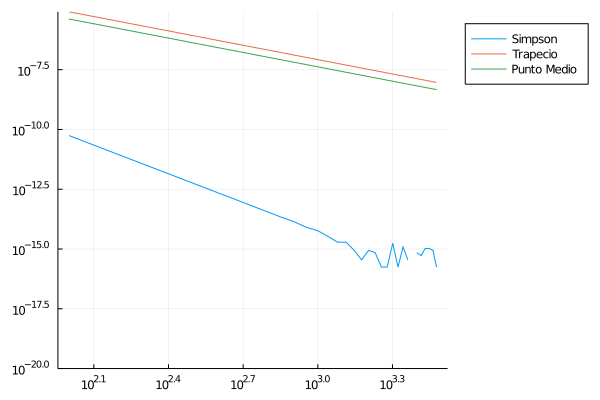

In [228]:
plot(del100al3000,ERelSimp.(del100al3000), label="Simpson", legend=:outertopright,
    xaxis=:log10, 
    yaxis=:log10,
    #xlims=(10^2,:auto),
    ylims=(10^-20,:auto)
)
plot!(del100al3000,ERelTrap.(del100al3000), label="Trapecio")
plot!(del100al3000,ERelPM.(del100al3000), label="Punto Medio")
#plot!(del1a100,dm7.(del1a100))

# Problema 6
En el repositorio 

    https://github.com/reula/MetodosNumericos2021/tree/main/Guias
    
se encuentran dos archivos de datos, 

    mediciones1-c1-g6.dat 
    mediciones2-c1-g6.dat

Los mismos almacenan mediciones de una función $f(t)$ sobre un mismo rango de $t$. El primero muestrea $n=629$ puntos y el segundo $n=10001$.

1. Baje y grafique los datos.

2. Copie y modifique los algoritmos del problema 3 para integrar muestreos de funciones.

3. Integre los muestreos y compare.

## Tutorial: bajando archivos desde una notebook de Julia

In [59]:
# Ejemplo de como bajar un archivo.
download(
    "https://raw.githubusercontent.com/reula/MetodosNumericos2021/main/Guias/mediciones2-c1-g6.dat", # Bajamos el archivo pos.dat del repositorio en el que están las guías.
    pwd() * "/" * "mediciones2-c1-g6.dat" # Guardamos pos.dat en un archivo llamado mediciones1-c1-g6.dat en el directorio local.
);

--2021-06-02 15:58:04--  https://raw.githubusercontent.com/reula/MetodosNumericos2021/main/Guias/mediciones2-c1-g6.dat
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.110.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 490049 (479K) [text/plain]
Guardando como: “/home/andresmateo/Documentos/Facu/Metodos Numericos/Guias Jupyter/mediciones2-c1-g6.dat”

     0K .......... .......... .......... .......... .......... 10% 1,07M 0s
    50K .......... .......... .......... .......... .......... 20% 2,90M 0s
   100K .......... .......... .......... .......... .......... 31% 1,33M 0s
   150K .......... .......... .......... .......... .......... 41% 5,02M 0s
   200K .......... .......... .......... .......... .......... 52% 1,98M 0s
   250K .......... .......... .......... .......... .......... 62% 3,34M 0s


1. **Tenga en cuenta que en Windows debe cambiar `"/"` por `"\"`!**

2. Cuando entre a github a ver los links a los archivos, seleccione primero el archivo, cuando se visualice selecione el botón **RAW**. Fíjese que el link debe comenzar con https://raw.githubusercontent.com

In [2]:
# Primero debemo abrir el archivo y separar los datos de Mediciones 1
funcion1 = Vector{Float64}()
rango1 = Vector{Float64}()
open("/home/andresmateo/Documentos/Facu/Metodos Numericos/Guias Jupyter/mediciones1-c1-g6.dat") do datos
    for linea = eachline(datos)
        fila= split(linea)
        f_t = parse(Float64,fila[1])
        t = parse(Float64,fila[2])
        push!(funcion1,f_t)
        push!(rango1,t)
    end
end

In [3]:
# Ahora de mediciones 2
funcion1 = Vector{Float64}()
puntos1 = Vector{Float64}()
open("/home/andresmateo/Documentos/Facu/Metodos Numericos/Guias Jupyter/mediciones1-c1-g6.dat") do datos
    for linea = eachline(datos)
        fila= split(linea)
        t = parse(Float64,fila[1])
        f_t = parse(Float64,fila[2])
        push!(funcion1,f_t)
        push!(puntos1,t)
    end
end

In [4]:
println(length(funcion1)," ",
length(rango1)," ",
length(funcion2)," ",
length(rango2))

LoadError: [91mUndefVarError: funcion2 not defined[39m

In [5]:
using Plots

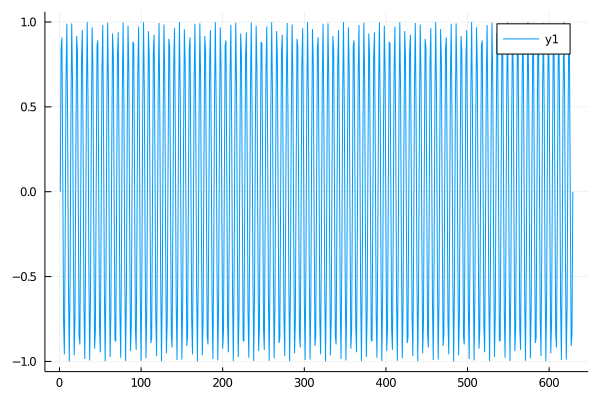

In [6]:
plot(funcion1)

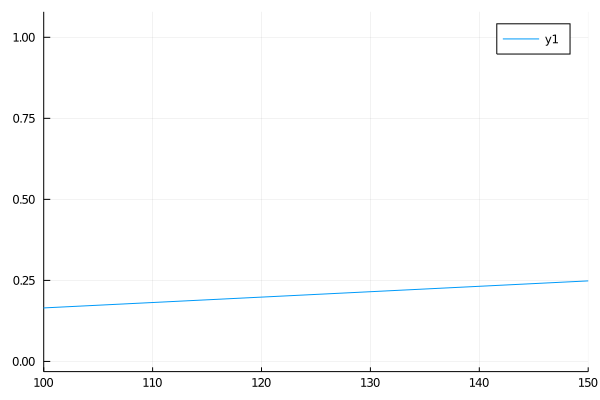

In [7]:
plot(puntos1,
xlims=(100,150)
)

In [10]:
# Ahora tengo los puntos y los valores de la funcion para cada punto, tengo que modificar los programas
# para que realicen la suma.

In [20]:
for i ∈ 1:length(puntos1)-2
    a = (puntos1[i+1]-puntos1[i]) == (puntos1[i+2]-puntos1[i+1])
    #print(a)
   # print(" ")
end;
# los puntos no son equidistantes, pero puedo suponer que lo son pero necesito el valor de h.

In [21]:
a = puntos1[2:end]-puntos1[1:end-1];

In [14]:
am = maximum(abs.(a))

0.001667512024200013

In [16]:
maximum(abs.(a.-am))

9.992007221626409e-15

In [85]:
# puedo sacar un promedio para obtener el valor de h.
s=0
for i ∈ 1:(length(puntos1)-1)
    s += puntos1[i+1]-puntos1[i]
end
h1 = s / length(puntos1)

0.0016648609716957076

In [88]:
s=0
for i ∈ 1:(length(puntos2)-1)
    s += puntos2[i+1]-puntos2[i]
end
h2 = s / length(puntos2)
sum(funcion2)

-8.419931418757187e-13

In [89]:
function PMdat(valores::Vector{Float64},
        puntos::Vector{Float64},
        )
    # calculo el h de los puntos
    s = 0
    for i ∈ 1:(length(puntos)-1)
        s += puntos[i+1]-puntos[i]
    end
    h = s/length(puntos)
    # supongo que las evaluaciones estan en el centro del intervalo con un corrimiento
    S = sum(valores)
    return h * S
end

PMdat (generic function with 1 method)

In [91]:
PMdat(funcion2,puntos2)

-8.816449917974044e-17

# Ejercicios Complementarios

## Problema C.1
Idem problema 4, para las siguientes integrales: 
1. $\int_{1/2}^1 x^4 dx$
2. $\int_0^{\pi/4} x \sin x dx$

## Problema C.2
**Integración numérica en dos dimensiones**
1. Haga un programa que integre funciones en la region $a\le x \le b\,;\;c \le y \le d$ siguiendo el código delineado en la clase teórica, usando el método de cuadratura de Simpson en cada coordenada.
2. Evalue numericamente con no menos de 8 cifras significativas las integrales
$$
\int_0^2\,dx\, \int_0^1\,dy\, e^{-x\,y} \;\;\;\;\;\;\;\;\;\;\;\;\;\;
\int_{7/5}^2\,dx\, \int_1^{3/2}\,dy\, \ln{(x+2 y)}
$$
3. Modifique el programa para permitir que los límites de integración en $y$ sean función de $x$ y evalue la integral
$$
\int_0^1\,dx\, \int_0^{\sqrt{1-x^2}}\,dy\, e^{-x\,y} 
$$